In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import collections

import dataset.cs1110fa18 as cs1110
import dataset.cs4410sp20 as cs4410
import dataset.cs4820fa20 as cs4820

In [16]:
# removes the 1000 most common english words to be able to see class specific vocab
# https://gist.github.com/deekayen/4148741
common = []
file = open('common', encoding="utf8")
f= file.read()
for word in f.lower().split():
    common += [word]

In [8]:
sample_text = "\n".join(cs4410.data) + \
    "\n".join(cs1110.data) + "\n".join(cs4820.data)
sample_text = sample_text.lower()

# all char histogram
# sample_text = [char for char in sample_text]

# char without spaces or newlines
# sample_text = [char for char in sample_text if char not in [' ', '\n']]

# char of only letters
# sample_text = [char for char in sample_text if char in list("abcdefghijklmnopqrstuvwxyz")]

# char of alphanumerals
# sample_text = [char for char in sample_text if char in list("abcdefghijklmnopqrstuvwxyz1234567890")]

# char of numbers
# sample_text = [char for char in sample_text if char in list("1234567890")]

# word histogram
sample_text = sample_text.split()

([<matplotlib.axis.XTick at 0x7f162d6f0910>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

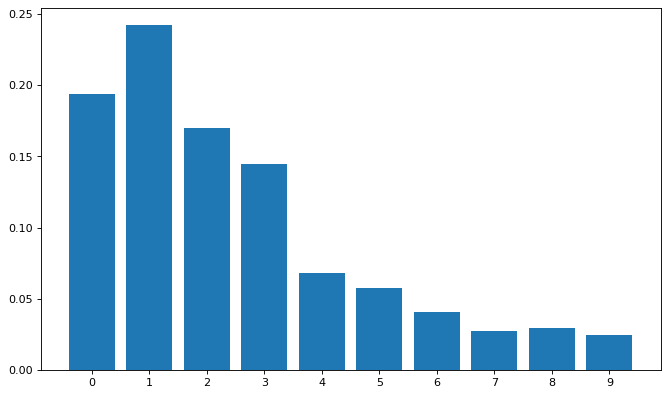

In [7]:
# use this for character level
# https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
labels, counts = np.unique(sample_text,return_counts=True)
counts = counts / sum(counts)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels)

<AxesSubplot:xlabel='Word'>

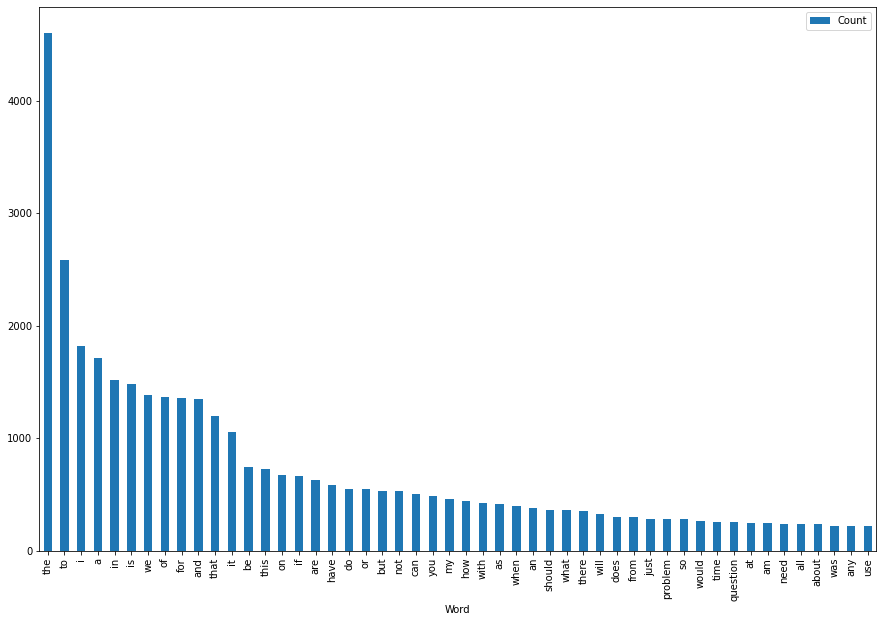

In [18]:
# use this for word level
# https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

wordcount = {}
for word in sample_text:
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("?","")
    word = word.replace("\n","")
#     if word not in common and word not in list("1234567890"):
        # remove if statement to include common words
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
word_counter = collections.Counter(wordcount)
n_count = 50 # change this to see more words, might need to change figsize
lst = word_counter.most_common(n_count)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count', figsize=(15,10))